###LOCALIZATION OF WHITE BOX IN A BLACK BACKGROUND USING A PRETRAINED VGG16(TRANSFER LEARNING)

In [1]:

import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
vgg = tf.keras.applications.VGG16(
    input_shape=[100, 100, 3], include_top=False, weights='imagenet')#3 beacuse the pretrianed VGG16 works in 3 channels and "include_top=False" because we donot want the head of the model

In [6]:
x = Flatten()(vgg.output)#we flatten the image to get vector
x = Dense(4, activation='sigmoid')(x)# 4-- numbers of the bounding box-- x1,y1,ht,wdt
model = Model(vgg.input, x)

In [7]:
def image_generator(batch_size=64):
  # generate image and targets
  while True:
    for _ in range(50):#50 is a random number... high batch_size means low epochs and vice-versa
      X = np.zeros((batch_size, 100, 100, 3))#input
      Y = np.zeros((batch_size, 4))#output... 100* 100 is an arbitrary choice
      
      for i in range(batch_size):
        row0 = np.random.randint(90)#randomly choose a number between 1 and 90 for the coordinate
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)
        X[i,row0:row1,col0:col1,:] = 1
        #scaling is done
        Y[i,0] = row0/100.
        Y[i,1] = col0/100.
        Y[i,2] = (row1 - row0)/100.
        Y[i,3] = (col1 - col0)/100.
      
      yield X, Y

In [8]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
model.fit_generator(
    image_generator(),
    steps_per_epoch=50,
    epochs=5,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
50/50 [==============================] - 40s 463ms/step - loss: 0.6638
Epoch 2/5
50/50 [==============================] - 23s 463ms/step - loss: 0.5171
Epoch 3/5
50/50 [==============================] - 23s 463ms/step - loss: 0.5125
Epoch 4/5
50/50 [==============================] - 23s 463ms/step - loss: 0.5074
Epoch 5/5
50/50 [==============================] - 23s 463ms/step - loss: 0.5016


In [10]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction():
  # Generate a random image
  x = np.zeros((100, 100, 3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)
  x[row0:row1,col0:col1,:] = 1
  print(row0, col0, row1, col1)
  
  # Predict
  X = np.expand_dims(x, 0)#for batch_size
  p = model.predict(X)[0]
  
  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
      (p[1]*100, p[0]*100),
      p[3]*100, p[2]*100,linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.show()


47 64 97 93


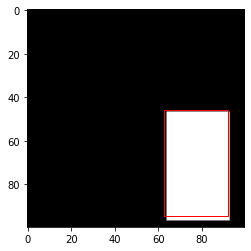

In [14]:
make_prediction()#run to see multiple predictions i.e, identify location of the box